In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading data
df = pd.read_csv("epl-goalScorer(20-21).csv")

# checking the dataframe 
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [5]:
# checking data types object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            522 non-null    int64  
 1   player_name   522 non-null    object 
 2   games         522 non-null    int64  
 3   time          522 non-null    int64  
 4   goals         522 non-null    int64  
 5   xG            522 non-null    float64
 6   assists       522 non-null    int64  
 7   xA            522 non-null    float64
 8   shots         522 non-null    int64  
 9   key_passes    522 non-null    int64  
 10  yellow_cards  522 non-null    int64  
 11  red_cards     522 non-null    int64  
 12  position      522 non-null    object 
 13  team_title    522 non-null    object 
 14  npg           522 non-null    int64  
 15  npxG          522 non-null    float64
 16  xGChain       522 non-null    float64
 17  xGBuildup     522 non-null    float64
dtypes: float64(5), int64(10), obje

In [6]:
# checking null
df.isnull().sum()

id              0
player_name     0
games           0
time            0
goals           0
xG              0
assists         0
xA              0
shots           0
key_passes      0
yellow_cards    0
red_cards       0
position        0
team_title      0
npg             0
npxG            0
xGChain         0
xGBuildup       0
dtype: int64

Data yang dimiliki sudah mempunyai datatypes yang sesuai dengan kolommnya dan juga tidak memiliki null/missing value sama sekali. \
Selanjutnya akan diolah data tersebut untuk mendapatkan beberapa insights.

# EDA

In [24]:
# sorting dataframe berdasarkan 'goals'
top10_goals = df.sort_values('goals', ascending = False)
top10_goals[['player_name', 'goals']].head(10)

,player_name,goals
0,Harry Kane,23
1,Mohamed Salah,22
2,Bruno Fernandes,18
3,Son Heung-Min,17
4,Patrick Bamford,17
5,Dominic Calvert-Lewin,16
6,Jamie Vardy,15
7,Ollie Watkins,14
8,Ilkay Gündogan,13
9,Alexandre Lacazette,13


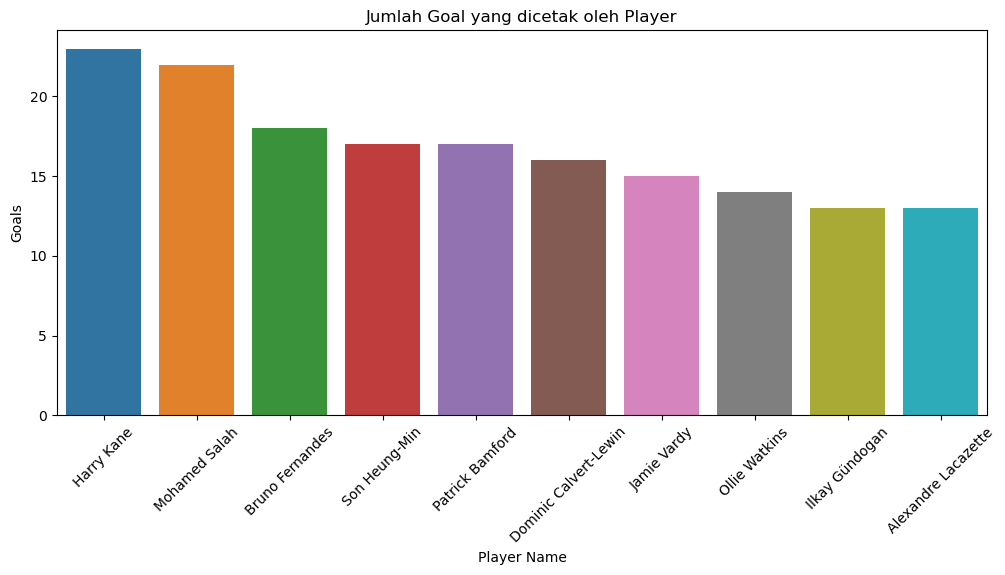

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(top10_goals, x = 'player_name', y='goals',
            order = top10_goals[['player_name', 'goals']].sort_values("goals",ascending = False)['player_name'][:10])

plt.title("Jumlah Goal yang dicetak oleh Player")
plt.xlabel("Player Name")
plt.ylabel("Goals")
plt.xticks(rotation = 45)
plt.show()

Berdasarkan dataframe dan juga barplot, dapat dilihat bahwa pencetak gol terbanyak di EPL adalah **Harry Kane (23 Goal)**, lalu dilanjuti dengan **Mohamed Salah (22 Goal)** dan juga **Bruno Fernandes (18 Goal)**.

In [101]:
# Q2. 10 player terlama durasi bermain

# sorting dataframe based on 'time'
top10_time = df.sort_values(['time', 'player_name'], ascending = False)
top10_time[['player_name', 'games','time']].head(10)

,player_name,games,time
110,Pierre-Emile Højbjerg,38,3420
311,Kasper Schmeichel,38,3420
296,Hugo Lloris,38,3420
378,Emiliano Martinez,38,3420
40,Stuart Dallas,38,3412
327,Matt Targett,38,3407
480,Luke Ayling,38,3400
204,Andrew Robertson,38,3391
55,Youri Tielemans,38,3359
361,Vicente Guaita,37,3330


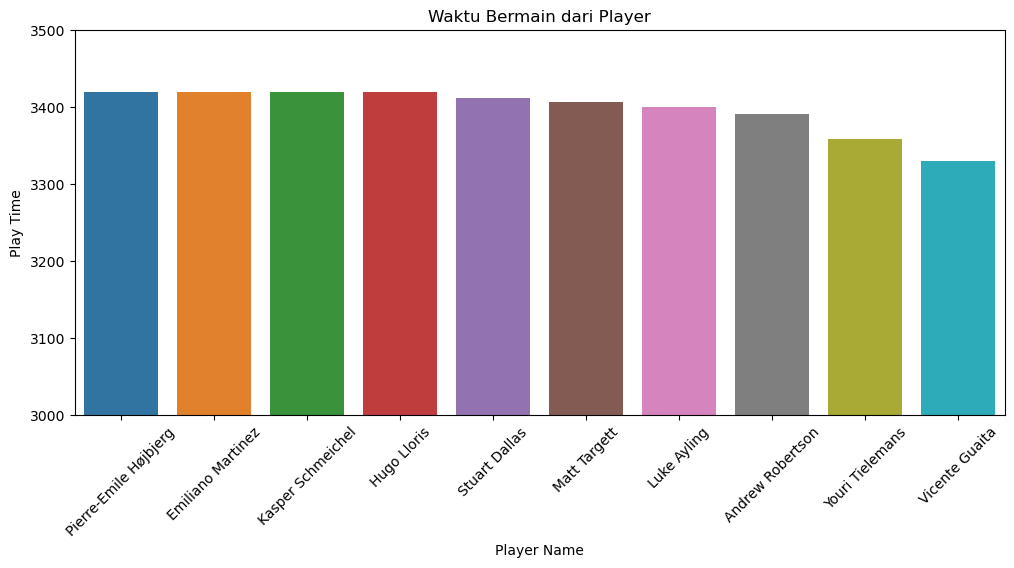

In [48]:
plt.figure(figsize=(12,5))
sns.barplot(top10_time, x = 'player_name', y='time',
            order = top10_time[['player_name', 'time']].sort_values("time",ascending = False)['player_name'][:10])

plt.title("Waktu Bermain dari Player")
plt.xlabel("Player Name")
plt.ylabel("Play Time")
plt.xticks(rotation = 45)
plt.ylim([3000, 3500])
plt.show()

Berdasarkan dataframe dan juga barplot, pemain yang memiliki durasi bermain terlama adalah **Hojbjerg, Emi Martinez, dan  K. Schmeichel** dengan waktu bermain **3420**

In [52]:
# Q3. 10 pemain terbanyak assist
top10_assist = df.sort_values("assists", ascending = False)
top10_assist[['player_name', 'assists']]

,player_name,assists
0,Harry Kane,14
2,Bruno Fernandes,12
58,Kevin De Bruyne,11
3,Son Heung-Min,10
51,Jack Grealish,10
...,...,...
290,James McCarthy,0
289,Phil Jagielka,0
287,Odion Ighalo,0
285,Timothy Fosu-Mensah,0


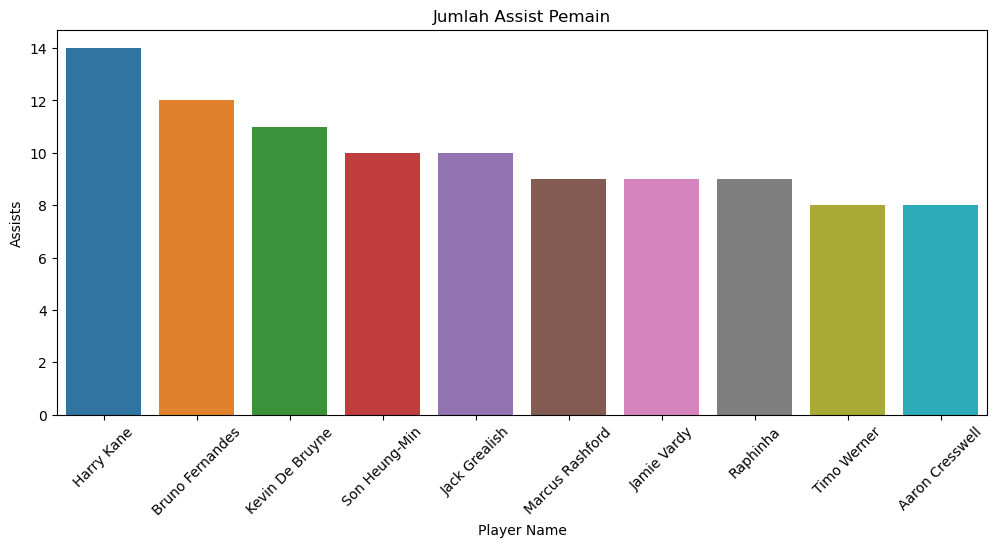

In [55]:
plt.figure(figsize=(12,5))
sns.barplot(top10_assist, x = 'player_name', y='assists',
            order = top10_assist[['player_name', 'assists']].sort_values("assists",ascending = False)['player_name'][:10])

plt.title("Jumlah Assist Pemain")
plt.xlabel("Player Name")
plt.ylabel("Assists")
plt.xticks(rotation = 45)
plt.show()

Berdasarkan dataframe dan juga barplot, pemain yang memiliki assist terbanyak adalah **Harry Kane (14 Assist)** yang dilanjuti oleh **Bruno Fernandes (12 Assist) dan Kevin De Bruyne (11 Assist)**.

In [62]:
# Q4. 4 pemain cetak gol terbanyak dari man city

# filtering dataframe to show only man city player
man_city = df[df['team_title'] == 'Manchester City']

# sorting for most goals
man_city_goal = man_city.sort_values("goals", ascending = False)
man_city_goal[['player_name', 'goals']].head(4)

,player_name,goals
8,Ilkay Gündogan,13
22,Raheem Sterling,10
28,Riyad Mahrez,9
35,Gabriel Jesus,8


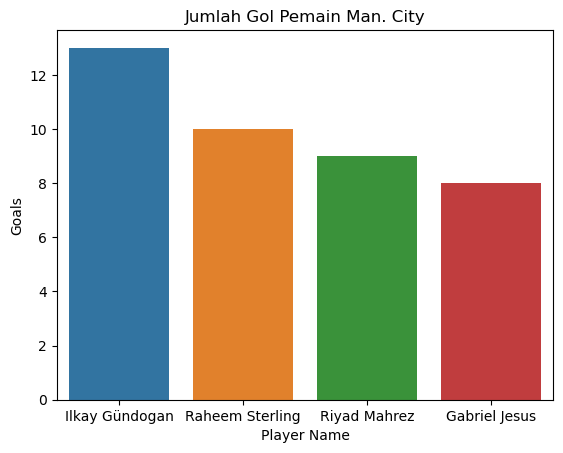

In [64]:
sns.barplot(man_city_goal.head(4), x = 'player_name', y = 'goals')

plt.title("Jumlah Gol Pemain Man. City")
plt.xlabel("Player Name")
plt.ylabel("Goals")
plt.show()

Berdasarkan dataframe dan juga barplot, 4 pemain yang mencetak gol terbanyak dari Manchester City adalah:
1. Ilkay Gundogan (13)
2. Raheem Sterling (10)
3. Riyad Mahrez (9)
4. Gabriel Jesus (8)

In [65]:
# Q5. Dari kesebelasan mana pencetak gol terbanyak
top10_goals.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


Berdasarkan dataframe diatas, dapat kita lihat bahwa pencetak gol terbanyak (Harry Kane) berasal dari kesebelasan **Tottenham**

In [73]:
# Q6. Berapa jumlah kartu kuning dan kartu merah yang didapatkan oleh pemain dengan jumlah assist terbanyak?

# filtering to Harry Kane
yellowCard =  df[df['player_name'] == 'Harry Kane']['yellow_cards'][0]
redCard = df[df['player_name'] == 'Harry Kane']['red_cards'][0]

print(f"Jumlah Kartu Kuning : {yellowCard} ")
print(f"Jumlah Kartu Merah : {redCard} ")

Jumlah Kartu Kuning : 1 
Jumlah Kartu Merah : 0 


Berdasarkan pertanyaan sebelumnya, telah diketahui bahwa Harry Kane merupakan pemain dengan assist terbanyak. \
Oleh karena itu, jumlah kartu kuning dan kartu merah yang didapati oleh Harry Kane adalah:
- Yellow Card = 1
- Red Card = 0

In [76]:
# Q7. Siapa yang jumlah assist dan gol nya terbanyak dan dari kesebelasan mana?
top10_goals.head(1)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257


In [77]:
top10_assist.head(1)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257


Berdasarkan pertanyaan sebelumnya dan juga beberapa plot sebelumnya, telah diketahui bahwa pemain yang memiliki jumlah gol dan assist terbanyak adalah **Harry Kane**. \
**Harry Kane** berasal dari kesebelasan **Tottenham**.

In [88]:
# Q8. 5 kesebelasan yang menyumbang gol paling banyak

# grouping dataframe based on team name
team_goal = df.groupby(['team_title']).agg(
    total_goal = ("goals", "sum"),
    total_assist = ('assists', 'sum')
)

team_goal = team_goal.reset_index()

# sorting to most goals
most_goals = team_goal.sort_values('total_goal', ascending = False)
most_goals.head()

,team_title,total_goal,total_assist
18,Manchester City,77,50
19,Manchester United,68,50
23,Tottenham,66,50
16,Liverpool,64,43
15,Leicester,64,45


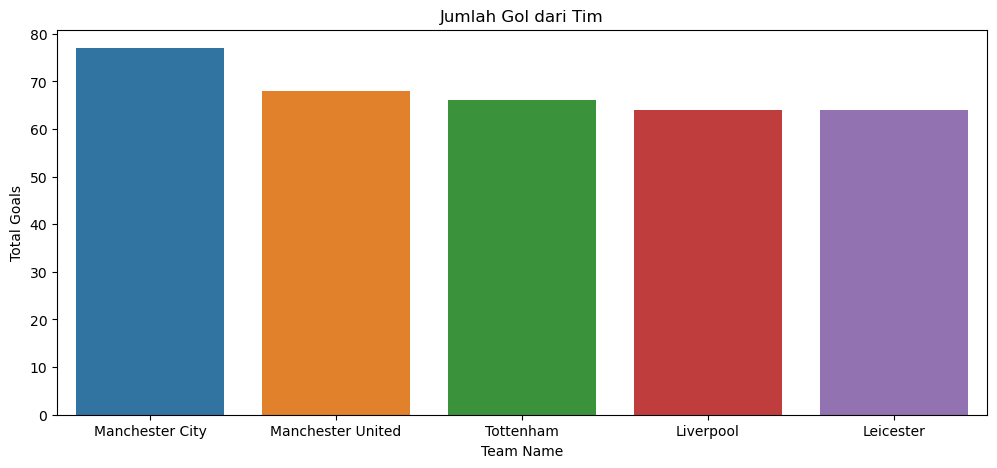

In [92]:
plt.figure(figsize=(12,5))
sns.barplot(data = most_goals.head(),
            x = "team_title",
            y = "total_goal")

plt.title("Jumlah Gol dari Tim")
plt.xlabel("Team Name")
plt.ylabel("Total Goals")

plt.show()

Berdasarkan dataframe dan juga barplot, 5 kesebelasan yang memiliki goal terbanyak adalah:
1. Manchester City (77)
2. Manchester United (68)
3. Tottenham (66)
4. Liverpool (64)
5. Leicester (64)

In [96]:
# Q9. Pemain dengan jumlah gol terbanyak tanpa mendapatkan kartu

# filtering to player that doesnt receive a card
# which mean 0 yellow card and 0 red card
no_card = df.loc[(df['yellow_cards'] == 0) & (df['red_cards'] == 0)]

# sorting player with most goals
no_card_sort = no_card.sort_values("goals", ascending = False)
no_card_sort[['player_name', "goals"]]

,player_name,goals
1,Mohamed Salah,22
3,Son Heung-Min,17
13,Chris Wood,12
28,Riyad Mahrez,9
29,Harvey Barnes,9
...,...,...
353,Lys Mousset,0
343,Islam Slimani,0
341,Moise Kean,0
340,Emerson,0


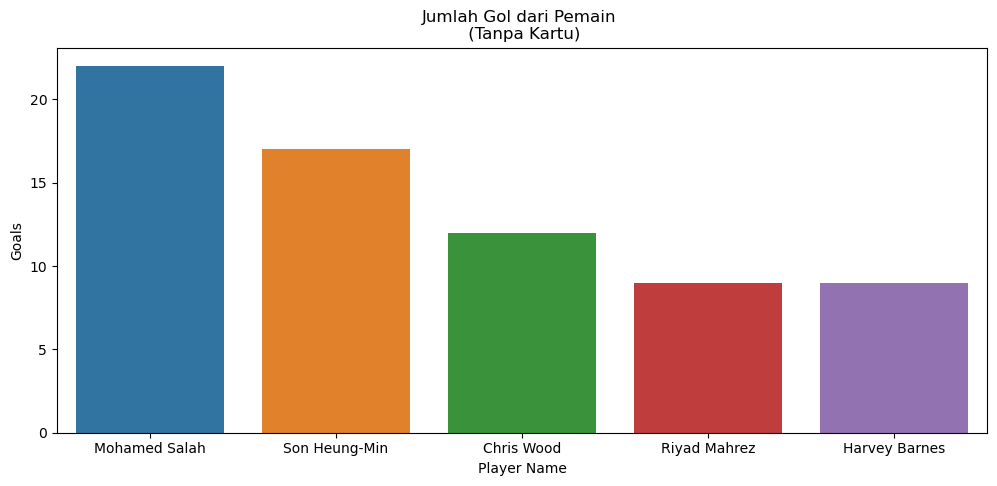

In [100]:
plt.figure(figsize=(12,5))
sns.barplot(no_card_sort.head(),
            x = "player_name",
            y = 'goals')

plt.title("Jumlah Gol dari Pemain \n (Tanpa Kartu)")
plt.xlabel("Player Name")
plt.ylabel("Goals")
plt.show()

Berdasarkan dataframe dan juga barplot, 5 pemain yang memiliki jumlah gol terbanyak tanpa mendapatkan kartu sama sekali adalah:
1. Mohamed Salah (22)
2. Son Heung-Min (17)
3. Chris Wood (12)
4. Riyad Mahrez (9)
5. Harvey Barnes (9)

# Kesimpulan

Berdasarkan EDA (Exploratory Data Analysis) yang telah dilakukan, berikut merupakan kesimpulan dari *findings* yang telah didapatkan:
1. Harry Kane merupakan pencetak gol terbanyak di EPL dengan 23 gol.
2. Hojbjerg, Emi Martinez, dan K. Schmeiche merupakan pemain yang memiliki waktu bermain terlama, yaitu 3420.
3. Harry Kane merupakan pemain yang memiliki assist terbanyak di EPL dengan jumlah 14 assist.
4. Gundogan, Sterling, Mahrez, dan G. Jesus merupakan 4 pemain dari Manchester City yang memiliki gol terbanyak.
5. Pencetak Gol terbanyak merupakan Harry Kane yang berasal dari kesebelasan Tottenham.
6. Jumlah kartu kuning dan kartu merah yang didapatkan oleh pemain dengan assist terbanyak (Harry Kane) adalah 1 dan 0.
7. Pemain dengan jumlah gol dan assist banyak adalah Harry Kane yang berasal dari kesebelasan Tottenham.
8. Man. City, Man. United, Tottenham, Liverpool, Leicester merupakan 5 kesebelasan yang memiliki gol terbanyak.
9. Mohamed Salah merupakan pemain yang memili gol terbanyak yang tidak pernah mendapatkan kartu.